<a href="https://colab.research.google.com/github/DucLeTrong/pytorch_review/blob/master/6_neural_net_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [0]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


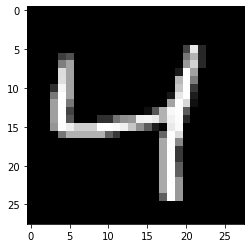

In [3]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[2].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [0]:
import torch
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [0]:
D_in = x_train.shape[1]
D_out = 10

In [30]:
D_in

784

In [0]:
import math
weights = torch.randn(D_in, D_out)/math.sqrt(D_in)
weights.requires_grad_()
bias = torch.zeros(D_out, requires_grad=True)

In [7]:
weights[0]

tensor([ 0.0412, -0.0363,  0.0469, -0.0579, -0.0535, -0.0155,  0.0136, -0.0151,
         0.0567,  0.0175], grad_fn=<SelectBackward>)

In [0]:
weights

tensor([[-0.0218, -0.0526,  0.0058,  ...,  0.0457, -0.0732, -0.0748],
        [-0.0551,  0.0069, -0.0303,  ...,  0.0299, -0.0608,  0.0333],
        [-0.0245,  0.0241, -0.0581,  ..., -0.0959, -0.0533,  0.0485],
        ...,
        [ 0.0460,  0.0454,  0.0008,  ..., -0.0139, -0.0392, -0.0123],
        [ 0.0472, -0.0246, -0.0244,  ...,  0.0257,  0.0526,  0.0452],
        [-0.0417,  0.0057, -0.0113,  ...,  0.0451,  0.0103,  0.0192]],
       requires_grad=True)

In [0]:
bias

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [0]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)
    # x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [0]:
def my_log_softmax(x):
    return (x.exp()/(x.exp().sum(-1))).log()

In [0]:
# log_softmax(a)

In [0]:
# my_log_softmax(a)

In [0]:
# x_train

In [0]:
# y_train

In [0]:
# model(xb)

In [0]:
def nll(input, target):
    # print("nll",input)
    return -input[range(target.shape[0]), target].mean()
loss_func = nll

# bs = 3
# xb = x_train[0:bs]  # a mini-batch from x
# preds = model(xb)  # predictions
# preds[0], preds.shape
# print(preds[0], preds.shape)
# yb = y_train[0:bs]
# print(loss_func(preds, yb))

In [0]:
# preds[range(3), yb]

In [0]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds==yb).float().mean()

In [0]:
lr = 0.5
epochs = 2
n, c = x_train.shape

In [0]:
# xb

In [0]:
# model(xb)

In [0]:
weights

tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], requires_grad=True)

In [0]:
# loss_func(preds, yb)

In [32]:
bs =64
for epoch in range(epochs):
    for i in range((n-1)//bs +1):
        start_i = i*bs
        end_i = start_i + bs
        xb = x_train[start_i: end_i]
        yb = y_train[start_i: end_i]
        # print(xb)
        # print(yb)
        preds = model(xb)

        loss = loss_func(preds, yb)
        # weights.grad.zero_()
        # bias.grad.zero_()
        # if i % 10 == 0:
        print(i,loss, accuracy(preds, yb))
        loss.backward()
        with torch.no_grad():
            # print(weights, weights.grad)
            weights -= weights.grad * lr
            bias -= bias.grad *lr
            weights.grad.zero_()
            bias.grad.zero_()
        # if i == 200:
        #     break
        

0 tensor(2.4126, grad_fn=<NegBackward>) tensor(0.0781)
1 tensor(1.8139, grad_fn=<NegBackward>) tensor(0.3125)
2 tensor(1.8028, grad_fn=<NegBackward>) tensor(0.3594)
3 tensor(1.5691, grad_fn=<NegBackward>) tensor(0.4844)
4 tensor(1.2526, grad_fn=<NegBackward>) tensor(0.6406)
5 tensor(0.9822, grad_fn=<NegBackward>) tensor(0.7969)
6 tensor(0.9142, grad_fn=<NegBackward>) tensor(0.8438)
7 tensor(1.0812, grad_fn=<NegBackward>) tensor(0.7344)
8 tensor(0.9586, grad_fn=<NegBackward>) tensor(0.7031)
9 tensor(1.1397, grad_fn=<NegBackward>) tensor(0.6250)
10 tensor(0.8953, grad_fn=<NegBackward>) tensor(0.7812)
11 tensor(0.9319, grad_fn=<NegBackward>) tensor(0.7344)
12 tensor(0.8094, grad_fn=<NegBackward>) tensor(0.6719)
13 tensor(0.9103, grad_fn=<NegBackward>) tensor(0.6406)
14 tensor(1.0391, grad_fn=<NegBackward>) tensor(0.6875)
15 tensor(0.7521, grad_fn=<NegBackward>) tensor(0.8438)
16 tensor(1.0202, grad_fn=<NegBackward>) tensor(0.6875)
17 tensor(0.9794, grad_fn=<NegBackward>) tensor(0.7188)
18